In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime, date
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from src.useful_func import do_everything, create_voting_classifier, create_graph
import matplotlib.pyplot as plt
import numpy as np


### Load initial Data
use the do_everything function from the useful_func.py file to load in the two data sets and perform all the cleaning necessary. This function requires two input strings specifying the location of the csv files, as well as a list of columns to be dropped. It should be noted that this function will also change the dates from a date time format to a discrete number of days that have pased. The function will also bin the the constuction years into five year increments and will replace any 'Nan' values with unknown. For categorical values with more than 20 entries, the function will keep the 20 most frequent entries and replace the rest with the string - 'other.' Lastly the function will return a train test split wit 95 percent and 5 percent of the data. It will also return the processed data frame and it's target values.

In [3]:
string_1 = 'data/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv'
string_2 = 'data/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv'
drop_columns = ['id', 'funder', 'num_private', 'longitude', 'latitude', 'wpt_name', 'subvillage', 'region_code', 'lga',
                'ward','recorded_by', 'scheme_name', 'extraction_type_group', 'payment', 'quality_group', 
                'quantity_group', 'source_type', 'source_class', 'waterpoint_type_group']


X_train, X_test, y_train, y_test, df_values, df_target = do_everything(string_1, string_2, drop_columns)

### Voting Classifier
create voting classifier combines 4 different types of classification methods - Logistic Regression, KNN, Random Forest, and Gradient Boosted Forest - by performing the classification with each method and having them vote. To protect against draws, the voting uses a 'softmax' which weights each vote by the how certain the model is with its predictions.  

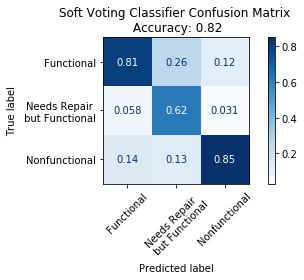

In [6]:
eclf, score = create_voting_classifier(X_train, X_test, y_train, y_test)

### Creating Graph: 
this function takes the ten values that are most postively correlated with the well functioning and moste negatively correlated with the well not functioning.

In [ ]:
create_graph(df_target, df_values)